In [9]:
# !pip install geodatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [geodatasets]


In [100]:
import os
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# os.chdir('..')
# os.getcwd()

'/Users/rujalshrestha/Projects/mac-migration/gisc-412/nepal-wildfire'

In [ ]:
df = gpd.read_file('data/Fire/DL_FIRE_M-C61_660433/fire_archive_M-C61_660433.shp')

In [6]:
df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry
0,27.5921,87.5385,306.2,1.1,1.1,2000-11-01,0500,Terra,MODIS,55,6.03,292.1,6.2,D,0,POINT (87.5385 27.5921)
1,29.1006,81.9170,330.6,1.3,1.1,2000-11-06,0518,Terra,MODIS,87,6.03,293.7,43.0,D,0,POINT (81.917 29.1006)
2,30.0881,81.3358,308.7,1.8,1.3,2000-11-07,0601,Terra,MODIS,58,6.03,291.2,21.1,D,0,POINT (81.3358 30.0881)
3,30.0841,81.3570,306.0,1.9,1.3,2000-11-07,0601,Terra,MODIS,37,6.03,287.4,17.1,D,0,POINT (81.357 30.0841)
4,30.1060,81.9647,315.0,2.1,1.4,2000-11-08,0506,Terra,MODIS,64,6.03,282.6,41.6,D,0,POINT (81.9647 30.106)


In [81]:
df['datetime'] = pd.to_datetime(
  df["ACQ_DATE"].astype(str) + " " + df['ACQ_TIME'].astype(str).str.zfill(4),
  format='%Y-%m-%d %H%M'
).drop(
  columns=["ACQ_DATE", "ACQ_TIME", "INSTRUMENT"]
)

df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry,datetime
0,27.5921,87.5385,306.2,1.1,1.1,2000-11-01,0500,Terra,MODIS,55,6.03,292.1,6.2,D,0,POINT (87.5385 27.5921),2000-11-01 05:00:00
1,29.1006,81.9170,330.6,1.3,1.1,2000-11-06,0518,Terra,MODIS,87,6.03,293.7,43.0,D,0,POINT (81.917 29.1006),2000-11-06 05:18:00
2,30.0881,81.3358,308.7,1.8,1.3,2000-11-07,0601,Terra,MODIS,58,6.03,291.2,21.1,D,0,POINT (81.3358 30.0881),2000-11-07 06:01:00
3,30.0841,81.3570,306.0,1.9,1.3,2000-11-07,0601,Terra,MODIS,37,6.03,287.4,17.1,D,0,POINT (81.357 30.0841),2000-11-07 06:01:00
4,30.1060,81.9647,315.0,2.1,1.4,2000-11-08,0506,Terra,MODIS,64,6.03,282.6,41.6,D,0,POINT (81.9647 30.106),2000-11-08 05:06:00


In [82]:
wildfires = df[df['datetime'].between('2020-01-01', pd.Timestamp.today())]

In [95]:
states_full = gpd.read_file('data/gadm41_NPL.gpkg', layer='ADM_ADM_3')

In [96]:
states_full.head()

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,NPL.1.1.1_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Bhaktapur,Bhadgaon| Khwopa|Bhaktapur Jilla,NA,Jilla,District,NA,NP.MM.BK,"MULTIPOLYGON (((85.4064 27.63235, 85.3987 27.6..."
1,NPL.1.1.2_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Dhading,NA,NA,Jilla,District,NA,NP.MM.DH,"MULTIPOLYGON (((84.90819 27.69722, 84.9026 27...."
2,NPL.1.1.3_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Kathmandu,KTM,NA,Jilla,District,NA,NP.MM.KT,"MULTIPOLYGON (((85.28735 27.58574, 85.28586 27..."
3,NPL.1.1.4_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Kavrepalanchok,"Kavrepalanchowk, Kavreplanchok",NA,Jilla,District,NA,NP.MM.KV,"MULTIPOLYGON (((85.69758 27.36454, 85.69907 27..."
4,NPL.1.1.5_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Lalitpur,Patan,NA,Jilla,District,NA,NP.MM.LL,"MULTIPOLYGON (((85.41771 27.43488, 85.41286 27..."


In [97]:
states = states_full.drop(columns=['GID_0', 'COUNTRY', 'CC_3', 'NL_NAME_1', 'NL_NAME_2', 'NL_NAME_3', 'VARNAME_3', 'TYPE_3']).rename(columns={
    'GID_1': 'PROVINCE_CODE',
    'GID_2': 'DISTRICT_CODE',
    'GID_3': 'STATE_CODE',
    'NAME_1': 'PROVINCE_NAME',
    'NAME_2': 'DISTRICT_NAME',
    'NAME_3': 'STATE_NAME',
    'ENGTYPE_3': 'TYPE',
    'HASC_3': 'SUBDIVISION_CODE',
})

states.head()

,STATE_CODE,PROVINCE_CODE,PROVINCE_NAME,DISTRICT_CODE,DISTRICT_NAME,STATE_NAME,TYPE,SUBDIVISION_CODE,geometry
0,NPL.1.1.1_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Bhaktapur,District,NP.MM.BK,"MULTIPOLYGON (((85.4064 27.63235, 85.3987 27.6..."
1,NPL.1.1.2_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Dhading,District,NP.MM.DH,"MULTIPOLYGON (((84.90819 27.69722, 84.9026 27...."
2,NPL.1.1.3_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Kathmandu,District,NP.MM.KT,"MULTIPOLYGON (((85.28735 27.58574, 85.28586 27..."
3,NPL.1.1.4_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Kavrepalanchok,District,NP.MM.KV,"MULTIPOLYGON (((85.69758 27.36454, 85.69907 27..."
4,NPL.1.1.5_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Lalitpur,District,NP.MM.LL,"MULTIPOLYGON (((85.41771 27.43488, 85.41286 27..."


In [98]:
states.crs == wildfires.crs

True

In [99]:
fire_with_state = gpd.sjoin(wildfires, states, how='left', predicate='within')

In [93]:
fire_with_state.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,...,datetime,index_right,STATE_CODE,PROVINCE_CODE,PROVINCE_NAME,DISTRICT_CODE,DISTRICT_NAME,STATE_NAME,TYPE_right,SUBDIVISION_CODE
53659,28.5604,82.7200,305.1,1.2,1.1,2020-01-13,0734,Aqua,MODIS,45,...,2020-01-13 07:34:00,57.0,NPL.4.3.4_1,NPL.4_1,Mid-Western,NPL.4.3_1,Rapti,Rukum,District,NP.MP.RK
53660,28.5115,81.2492,300.0,1.5,1.2,2020-01-13,0734,Aqua,MODIS,24,...,2020-01-13 07:34:00,45.0,NPL.4.1.2_1,NPL.4_1,Mid-Western,NPL.4.1_1,Bheri,Bardiya,District,NP.MP.BR
53661,26.6773,86.9825,317.9,1.1,1.1,2020-01-15,0721,Aqua,MODIS,77,...,2020-01-15 07:21:00,31.0,NPL.2.3.3_1,NPL.2_1,East,NPL.2.3_1,Sagarmatha,Saptari,District,NP.PW.ST
53662,28.3409,84.4350,304.1,1.0,1.0,2020-01-20,0740,Aqua,MODIS,58,...,2020-01-20 07:40:00,65.0,NPL.5.2.3_1,NPL.5_1,West,NPL.5.2_1,Gandaki,Lamjung,District,NP.PM.LM
53663,28.2043,84.4248,302.0,1.2,1.1,2020-01-22,0728,Aqua,MODIS,50,...,2020-01-22 07:28:00,65.0,NPL.5.2.3_1,NPL.5_1,West,NPL.5.2_1,Gandaki,Lamjung,District,NP.PM.LM


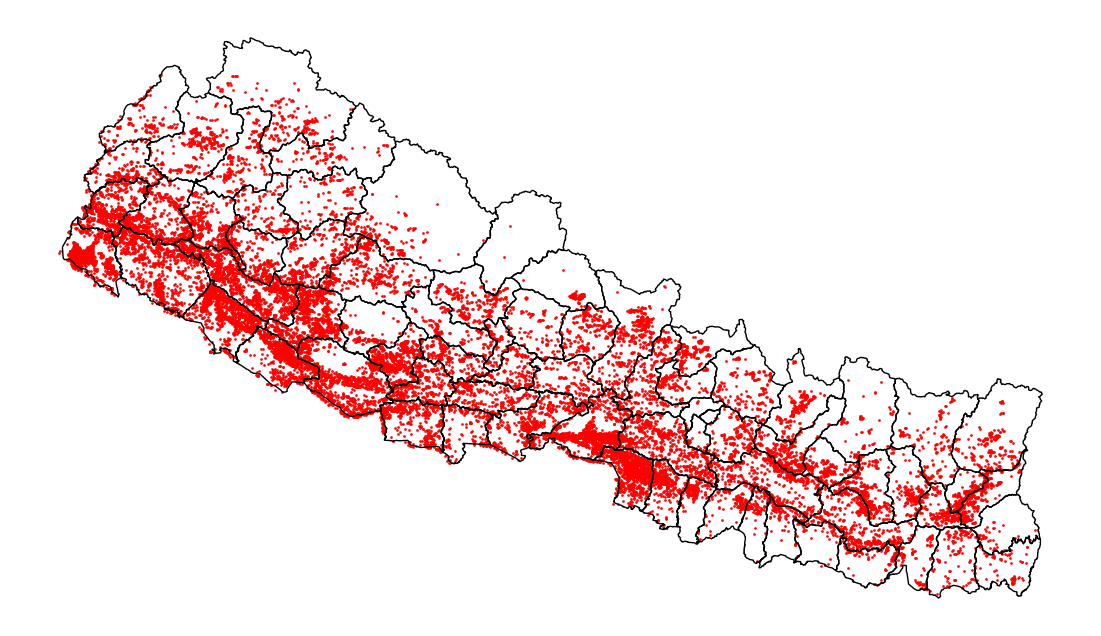

In [124]:
fig, ax = plt.subplots(figsize=(15, 8))

states.boundary.plot(ax = ax, color='black', linewidth=1)
wildfires.plot(ax = ax, color = 'red', markersize=1, alpha=0.9)


ax.set_axis_off()

plt.show()

In [127]:
fire_counts = (
  fire_with_state.groupby('STATE_CODE').
  size()
  .reset_index(name='FIRE_COUNT')
)

print(len(fire_counts))

fire_counts.head()

75


,STATE_CODE,FIRE_COUNT
0,NPL.1.1.1_1,1
1,NPL.1.1.2_1,318
2,NPL.1.1.3_1,10
3,NPL.1.1.4_1,224
4,NPL.1.1.5_1,29


In [128]:
states_fire = states.merge(fire_counts, on='STATE_CODE', how='left')

states_fire.head()

,STATE_CODE,PROVINCE_CODE,PROVINCE_NAME,DISTRICT_CODE,DISTRICT_NAME,STATE_NAME,TYPE,SUBDIVISION_CODE,geometry,FIRE_COUNT
0,NPL.1.1.1_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Bhaktapur,District,NP.MM.BK,"MULTIPOLYGON (((85.4064 27.63235, 85.3987 27.6...",1
1,NPL.1.1.2_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Dhading,District,NP.MM.DH,"MULTIPOLYGON (((84.90819 27.69722, 84.9026 27....",318
2,NPL.1.1.3_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Kathmandu,District,NP.MM.KT,"MULTIPOLYGON (((85.28735 27.58574, 85.28586 27...",10
3,NPL.1.1.4_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Kavrepalanchok,District,NP.MM.KV,"MULTIPOLYGON (((85.69758 27.36454, 85.69907 27...",224
4,NPL.1.1.5_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Lalitpur,District,NP.MM.LL,"MULTIPOLYGON (((85.41771 27.43488, 85.41286 27...",29


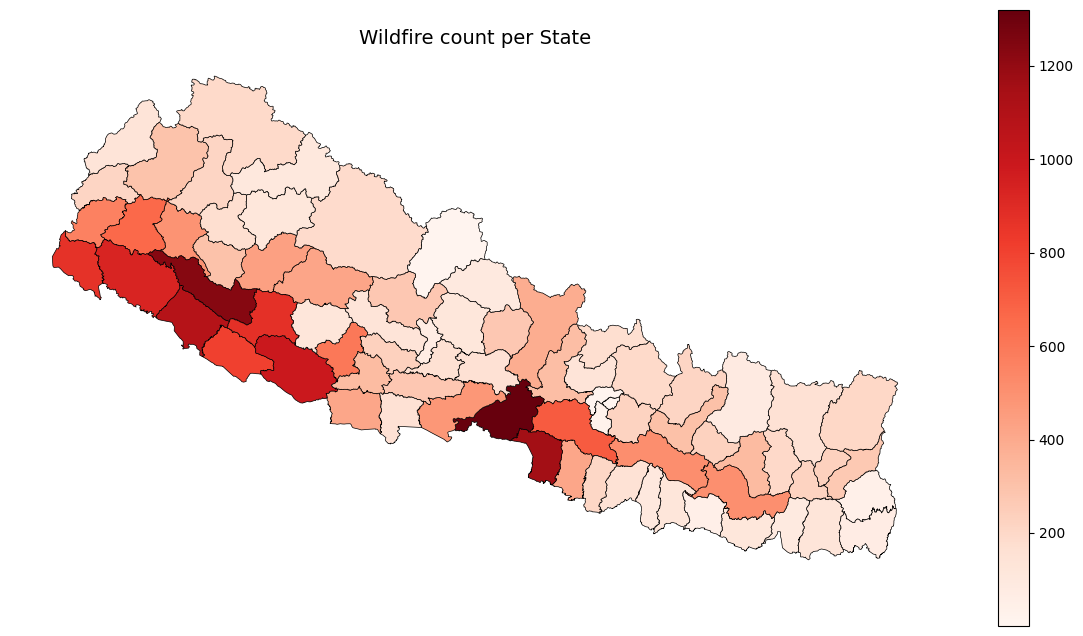

In [142]:
fig, ax = plt.subplots(figsize=(15, 8))

states_fire.plot(
  column='FIRE_COUNT',
  ax = ax,
  cmap='Reds',
  legend=True,
  edgecolor='black',
  linewidth=0.5
)

ax.set_axis_off()

plt.title('Wildfire count per State', fontsize=14)

plt.show()

In [ ]:
m = states_fire.explore(
  column='FIRE_COUNT',
  cmap='Reds',
  legend=True,
  tooltip=['STATE_NAME', 'FIRE_COUNT'],
  style_kwds={
    'color': 'black',
    'weight': 1,
    'fillOpacity': 0.8
  }
)

# m.save('output/wildfire_states_count.html')

# m

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich